# 1Т. Тема 3.1 Введение в нейронные сети.

В данном модуле обучения рассмотрим, что такое искусственные нейронные сети (ИНС), как устроена простейшая нейронная сеть, как загружают и обрабатывают для неё данные, как устроена простейшая полносвязная нейронная сеть и как её обучают.

Далее, ознакомимся с тем, как обрабатывают данные после обучения, и как оценить качество обучения, выдвинуть гипотезы, почему обучение может проходить не так хорошо, как нам хотелось бы, и как улучшить в итоге качество обработки данных ИНС.

## 3.1.2 Основные архитектуры и задачи нейронных сетей (Скринкаст)

**Напомним основные подходы к обучению, которые рассматривали раньше.**

В машинном обучении есть два основных концептуально разных подхода к "обучению" искусственного интеллекта:

1. Обучение с учителем;
2. Обучение без учителя.

**Обучение с учителем** - это способ, при котором для обучения используются так называемые **размеченные** данные, т.е. такие, которые содержат не только входные данные [x], но и правильные ответы - метки [y] (по другим обозначениям - стимул и реакция).

При **обучении без учителя** модель использует неразмеченные данные, из которых алгоритм самостоятельно пытается извлечь признаки и зависимости.

**Обучение с частичным привлечением учителя** представляет собой нечто среднее. Оно использует небольшое количество размеченных данных и большой набор неразмеченных.

**Обучение с подкреплением** тренирует алгоритм при помощи системы поощрений. Агент получает обратную связь в виде вознаграждений за правильные действия. Похожим образом дрeссируют животных.



### **Какие задачи можно решать с помощью нейронных сетей?**

Из машинного обучения хорошо известны такие классические задачи, как **регрессия, классификация, временные ряды, некоторые задачи анализа текста**. Используя нейронные сети, можно решать не только эти задачи, но и многие другие, которые в классическом машинном обучении решить было бы намного труднее или затратнее, а также часто с меньшим качеством результата. Такие, как например **генерация данных - текста, изображений и других, детекция, трекинг, сегментация (частный случай классификации), выделение именованных сущностей** и другие. Часть из этих задач мы рассмотрим в данном курсе.

### Основные архитектуры нейронных сетей
Нейронные сети подразделяются на несколько основных типов архитектур, и огромное множество конкретных архитектур под определённые типы задач. Мы рассмотрим несколько из них. Для многих задач можно применять такие основные типы, как *полносвязные* и *свёрточные* нейронные сети. Полносвязные сети классические и их элементы содержатся во многих других типах архитектур. Однако, для их обучения в среднем требуется большее количество ресурсов и памяти, чем для родственных им свёрточных нейронных сетей. Кроме того, свёрточные нейронные сети менее склонны к переобучению. *Рекуррентные* и *трансформеры* часто используются там, где есть взаимосвязь между данными во времени, а предыдущие данные могут быть использованы для прогноза поведения чего-либо в будущем. Например, когда в данных есть сезонность, периодичность, взаимосвязь между информацией в тексте и т.д. Основное отличие трансформеров от рекуррентных сетей - возможность распараллеливания при обработке данных и встроенный механизм внимания, хотя этот механизм можно применить и к другим типам нейронных сетей.

Переобучение и механизм внимания мы рассмотрим в следующих темах. А пока рассмотрим полносвязные нейронные сети.

## Загрузка необходимых модулей

In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling1D # Подключаем класс Dense - полносвязный слой, и Flatten - данные выстраиваем в линию, одномерные
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
# from tensorflow.keras.preprocessing import image #Для отрисовки изображения

# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # для построения матрицы ошибок
from sklearn.preprocessing import StandardScaler # для нормализации данных

import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Библиотека pandas

# from google.colab import files #Для загрузки своей картинки

import matplotlib.pyplot as plt #Отрисовка изображений
import seaborn as sns # seaborn, надстройка визуализации над matplotlib
from PIL import Image #Отрисовка изображений
# import pylab # Модуль для построения графиков
# from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

## Выборки данных, подготовка

Напомним, размеченные данные составляют основу обучающей выборки при обучении с учителем. При этом, для проверки из этих данных выделяют обычно ещё две выборки, которые при обучении сеть "не видит", и они ей незнакомы. Первая используется для проверки "на лету", в процессе обучения. Её называют **валидационной выборкой**. Сравнивая на валидационной выборке правильные ответы и предсказанные нейронной сетью значения, мы можем судить о том, насколько хорошо и правильно сеть изучила основные закономерности взаимосвязи между входными данными и метками. Бывает, что сеть заучивает сами данные, но не находит закономерности, и тогда она плохо предсказывает ответы по новым данным. Это называют переобучением. Обычно такая ситуация возникает, когда сложность нейросети избыточна по отношению к закономерностям в данных.

**Тестовую выборку** применяют для окончательной оценки работоспособности сети, на случай, если что-то пошло не так при проверке на валидации, и мы получили неправильные данные.

Объём тестовой, валидационной выборок обычно составляет от 1/3 до 1/5 от исходного объёма размеченных данных для каждой.

**Предварительная обработка данных** зачастую зависит от конкретных данных, типа ИНС, чистоты самих данных, и конечно, поставленной задачи. Мы рекомендуем при обработке всегда задумываться о том, в каком виде принимает данные нейронная сеть, т.е. прочесть документацию о размерах, формате, порядке подачи данных, продумать, какие данные хотите обработать и в каком виде хотите подать в нейронную сеть, как обработать без ошибки. Исходя из этого, построить логическую цепочку обработки данных. Проверяйте данные визуально и по размерностям, вначале после каждой операции обработки, чтобы убедиться, что обработка прошла правильно.

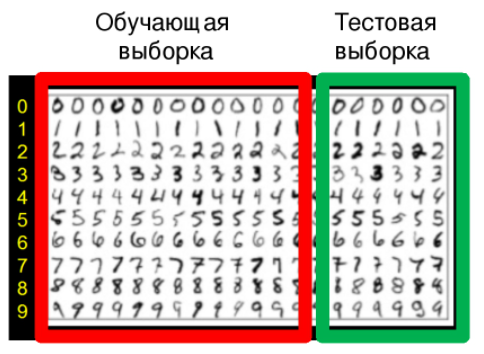

### Загружаем данные MNIST

В TensorFlow, частью которого сейчас является Keras, есть тренировочные наборы данных, которые встроены в сам фреймворк. Выше мы импортировали один из таких наборов данных - тренировочные данные по "узнаванию" рукописных цифр MNIST на картинке.


In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train_org.shape)
print(y_train_org.shape)
print(x_test_org.shape)
print(y_test_org.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train_org[0].shape

(28, 28)

### Пример - выводим на экран картинку цифры из массива

In [ ]:
def show_image(n):
  plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) #Отрисовка картинки
  plt.show() # Вывод картинки

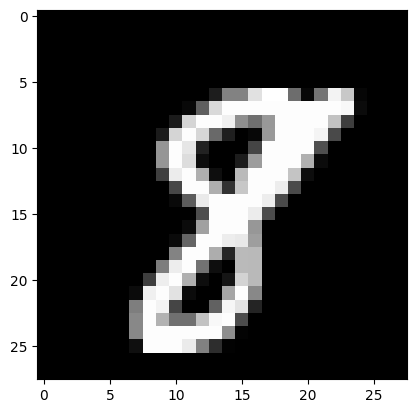

In [ ]:
show_image(55)

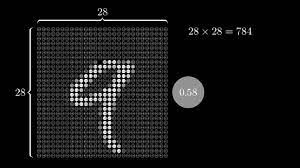

### Переводим данные в тип float
Данный тип (с плавающей точкой) необходим сетям Керас для обучения:

In [ ]:
x_train_2D = x_train_org.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_test_2D = x_test_org.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)

### Нормализуем данные
В данном случае можно использовать простой вариант. Цветов всего 255, и меняются они через равные промежутки, поэтому удобно не применять скейлер, а поделить массив на 255. Вообще, данные стараются свести все к одинаковому диапазону, обычно 0...1. Это нужно для того, чтобы все признаки одинаково оценивались нейросетью, без значительного перекоса в сторону тех, которые больше и потому сеть им уделяет больше внимания.

In [ ]:
print(np.unique(x_train_2D)) # какие значения в массиве до нормализации
print(np.unique(x_test_2D))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [ ]:
x_train_2D = x_train_2D / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test_2D = x_test_2D / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
print(np.unique(x_train_2D)) # какие значения в массиве после нормализации
print(np.unique(x_test_2D))

[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902
 0.32941177 0.33333334 0.3372549  0.34117648 0.34509805 0.3490196

### Делаем из данных векторы вместо матриц
Для простоты вначале будем подавать в нейросеть "вытянутые как верёвка" данные, а не "плоскую" двумерную картинку. При этом матрица картинки одной цифры имеет 28 столбцов и 28 строк. Мы изменяем размерность так, что строки, которые шли сверху вниз, от 0 до 27 индекса, теперь будут располагаться слева направо, от 0 до 27 по порядку, и "сшиты" между собой в одну линию, получается одна строка в 28 * 28 = 784 значения данных (столбца):

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_2D.reshape(60000, 784)
x_test = x_test_2D.reshape(10000, 784)
print(x_train_2D.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
x_train[55].shape

(784,)

In [ ]:
def show_lin_image(n):
  plt.figure(figsize=(36, 12)) # задаем размеры всего рисунка
  plt.imshow(Image.fromarray(x_train[n].reshape(1,-1) * 255).convert('RGB')) #Отрисовка картинки
  plt.show() # Вывод картинки

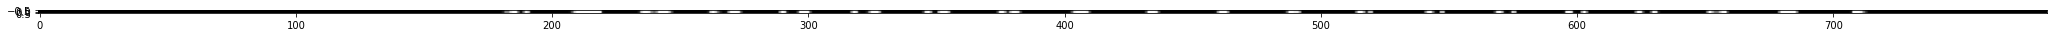

In [ ]:
show_lin_image(55)

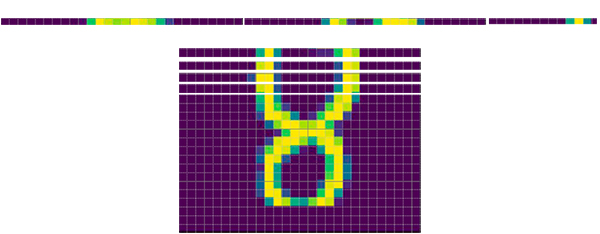

### Пример - вывели для наглядности метку из массива
Метку взяли той же цифры, картинку массива которой вывели на экран выше:

In [ ]:
y_train_org[55]

8

### Переводим метки в формат One Hot Encoding (OHE)

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

При кодировании в OHE, вместо числа получаем вектор из всех нулей, кроме одной цифры - вместо нуля на той позиции (индексе), которой соответствует кодируемая цифра, стоит 1. Проверим это, используя индексацию:

In [ ]:
y_train_org[55]

8

In [ ]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_train[55]) #Выводим пример одного выходного вектора

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(y_train[55,8]) #Выводим пример цифры по индексу

1.0


In [ ]:
print(y_train_org.shape)
print(y_train_org[55])

(60000,)
8


## Искусственная нейронная сеть

**Искусственная нейронная сеть** - это математическая модель настоящей нейронной сети, то есть мозга. На практике, это обучаемый под требуемую задачу инструмент.

Искусственная нейронная сеть представляет собой набор матриц, с которыми работают по законам линейной алгебры, как мы увидели в модуле Numpy. Тем не менее, проще представить её как набор слоёв нейронов, связанных между собой засчёт входных и выходных связей. Различают внешние слои - входной и выходной, и внутренние, находящиеся между ними.

У каждого отдельного нейрона может быть несколько входных связей, у каждой из связей - свой множитель усиления (ослабления) влияния связи - весовой коэффициент. На выходе нейрона действует функция активации, засчёт нелинейностей функций активации и подбора параметров-весов на входе нейрона, нейронная сеть и может обучаться.



**Перцептрон**

Аналог нейрона. Из них состоит ИНС.

Важные понятия:
вес, смещение, функция активации.


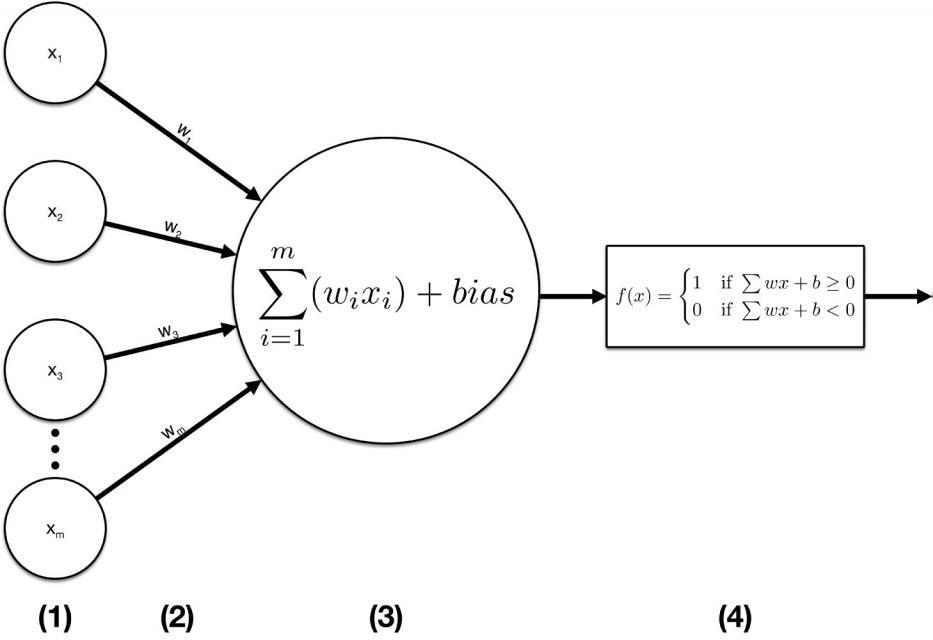

**Функции активации**

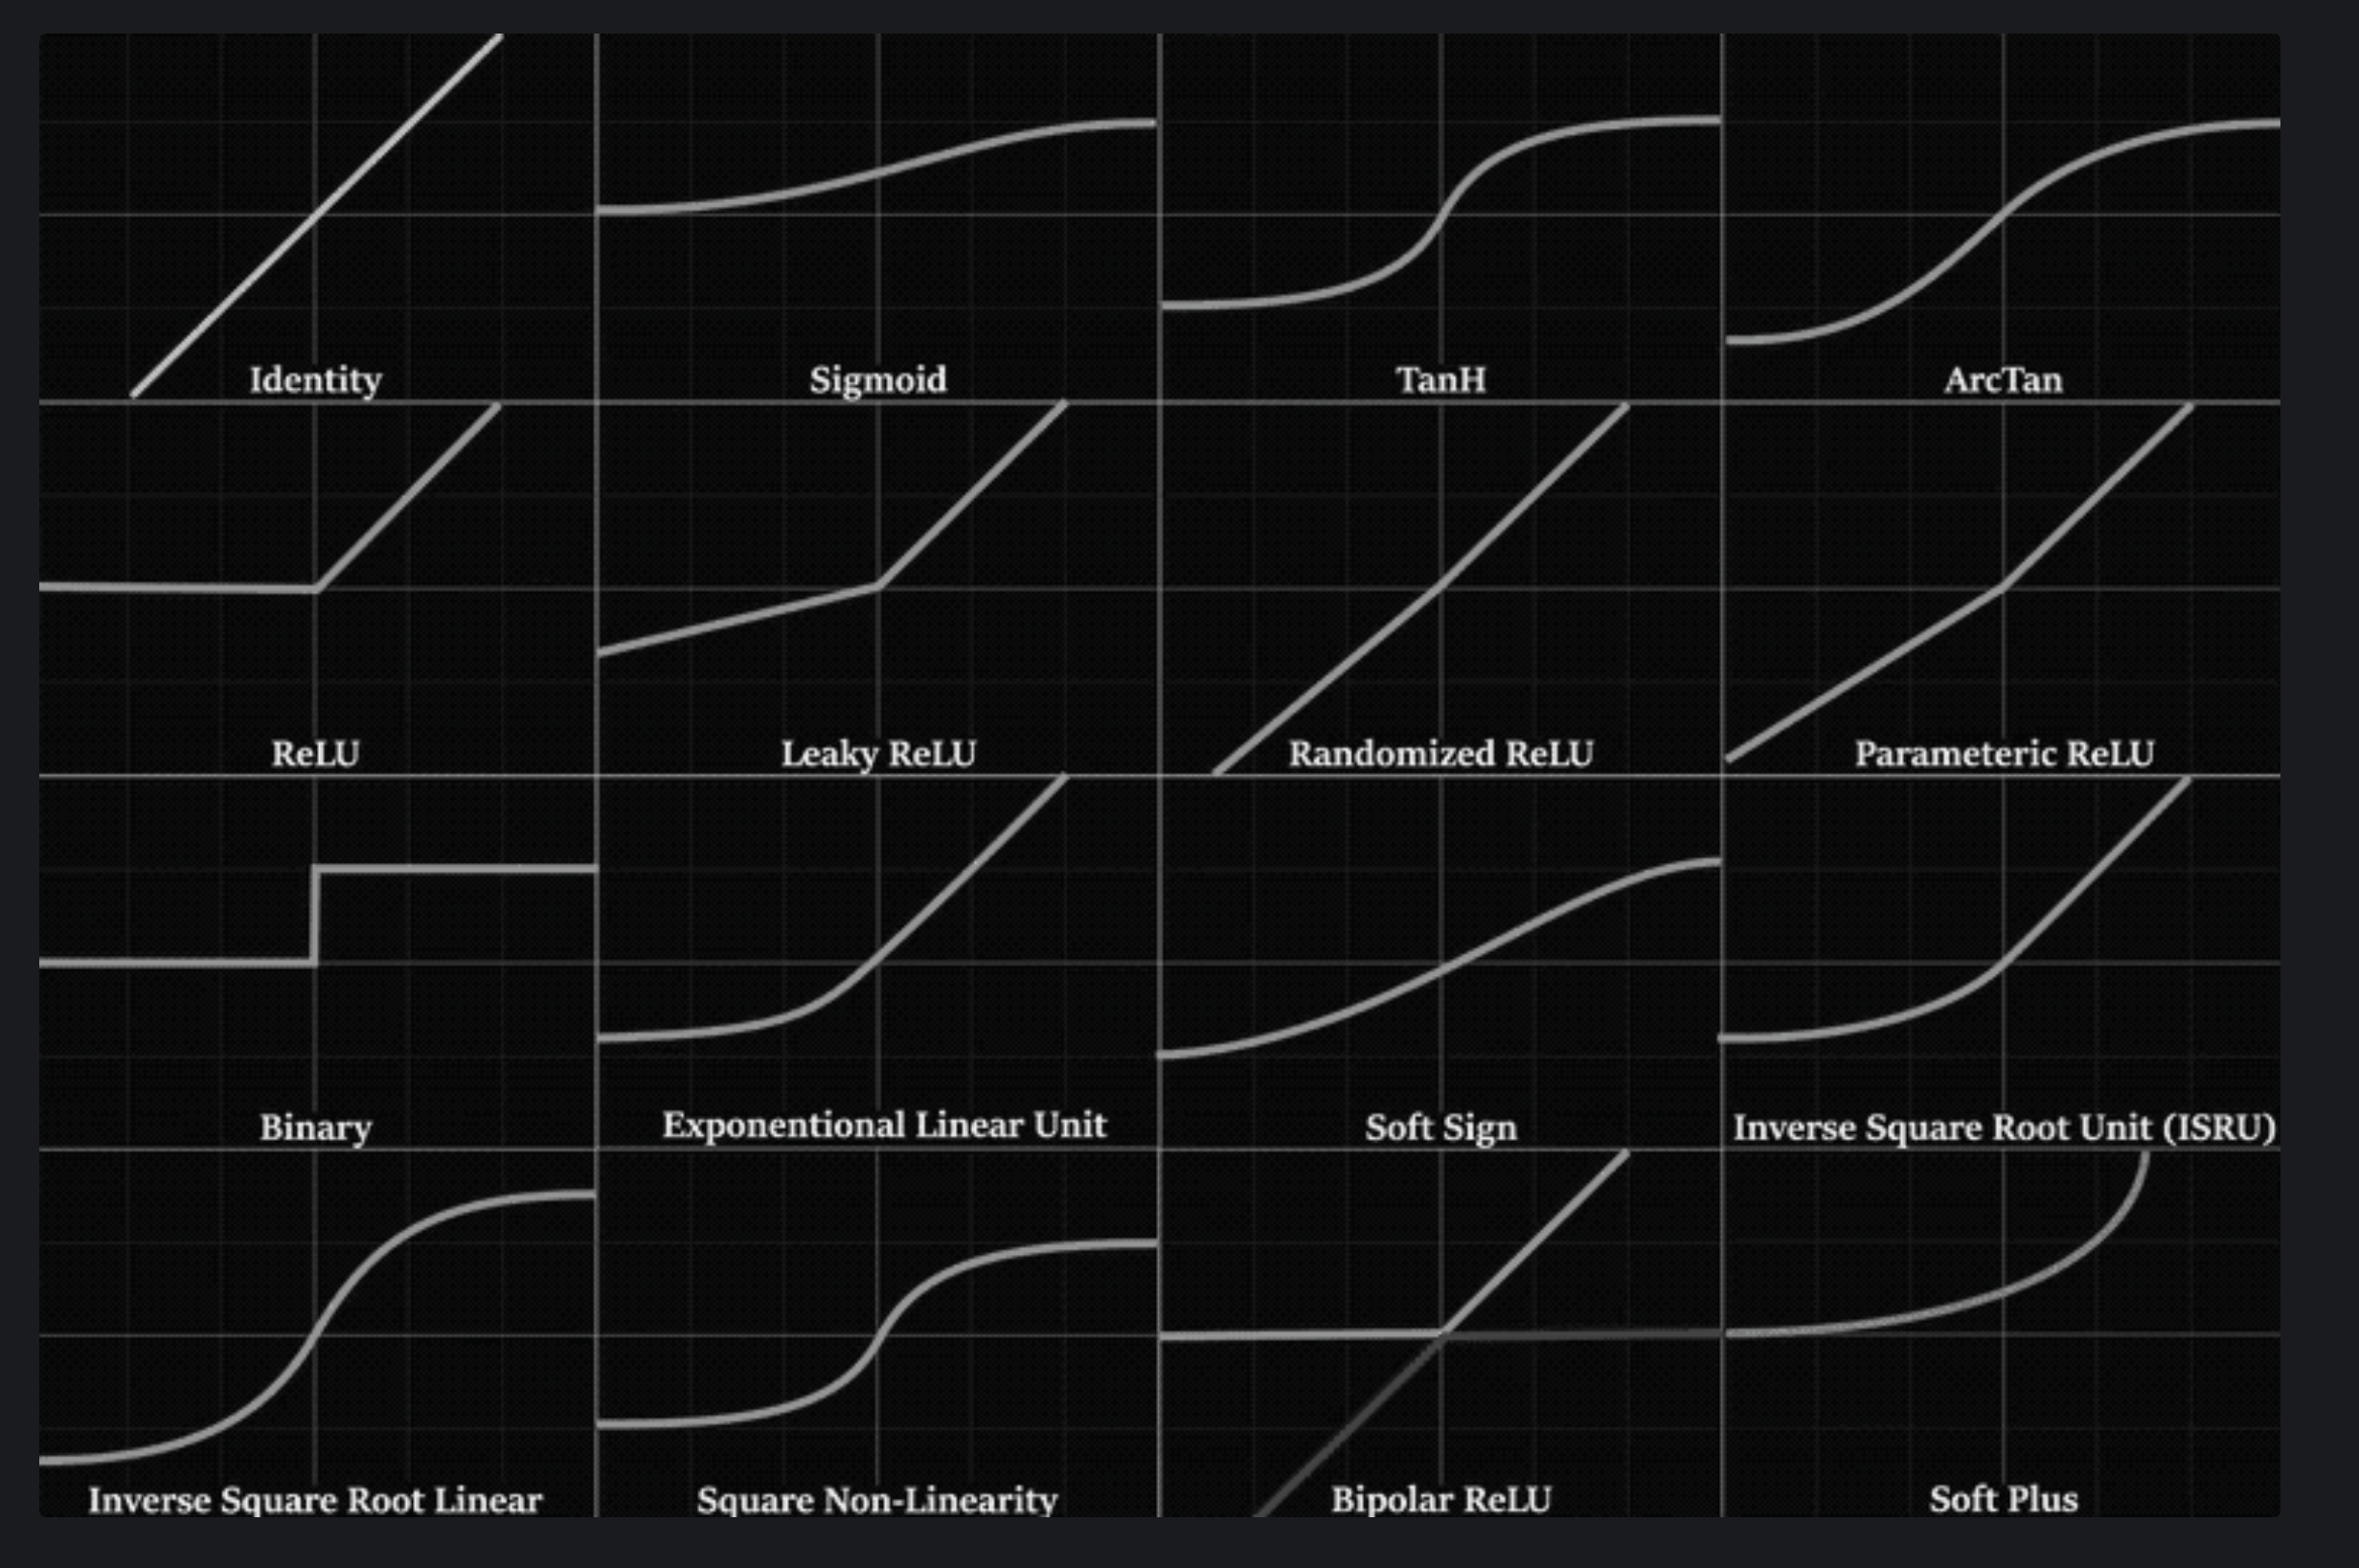

Сейчас мы будем рассматривать **полносвязную сеть** - состоящую только из **полносвязных** слоёв Dense.

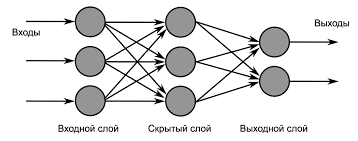

## 3.1.3 Производная, оптимизация (Скринкаст)

**Понятие производной**


Производная функции − это результат дифференцирования функции.

Дифференцирование в математике — это процесс, при котором функция f превращается в другую функцию f’ ("производная от f") по определённому правилу.

Простыми словами, производная — это наклон отрезка между двумя точками (этим отрезком может быть касательная в точке). Математически, это тангенс наклона, и взяв от него арктангенс, можно получить угол наклона:
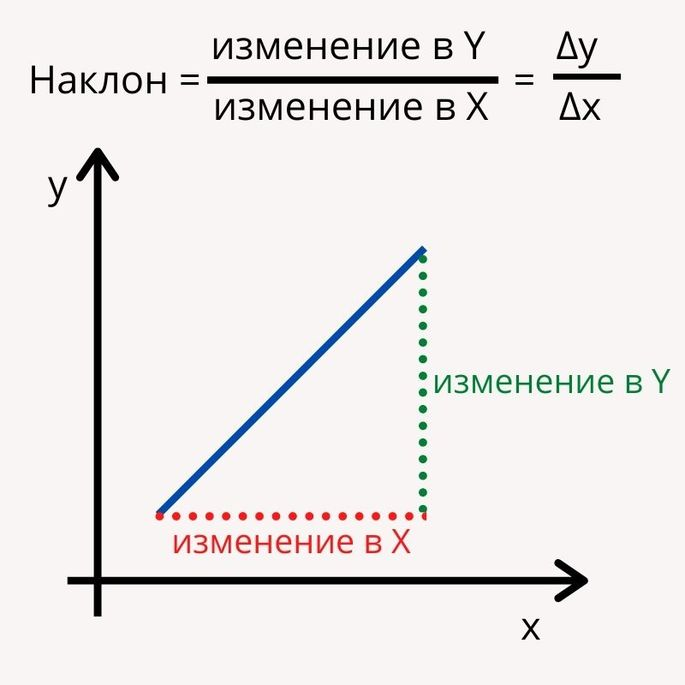

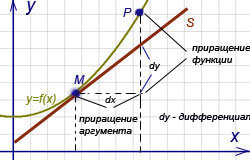

Другое представление - производная это скорость изменения функции. Пример производной из жизни - обычная скорость, т.е. скорость изменения координаты. Но скорость мгновенная, в каждой точке в определённый момент времени, а не средняя.

Для чего нужна производная? Применений на самом деле много, но поговорим об основных для понимани и для нашего случая.

С одной стороны, можно использовать производную, чтобы найти точки перегиба функции. В этих точках угол наклона касательной равен нулю, а значит, нулю равны и тангенс угла, и производная.

С другой, можно найти путь к локальному (местному) максимуму функции - максимуму неподалёку от выбранной нами точки функции. Для этого используется вектор градиента. Но поскольку у нашей функции - нейронной сети с расчётом минимума ошибки - нам интересен минимум, то используется не градиент, а вектор, который ему параллелен, но направлен в другую сторону, то есть градиент со знаком минус. Ниже увидим, как градиент поможет достичь минимума функции, что равноценно оптимизации нашей функции нейронной сети.

Особенности обучения нейронных сетей. **Градиентный спуск**

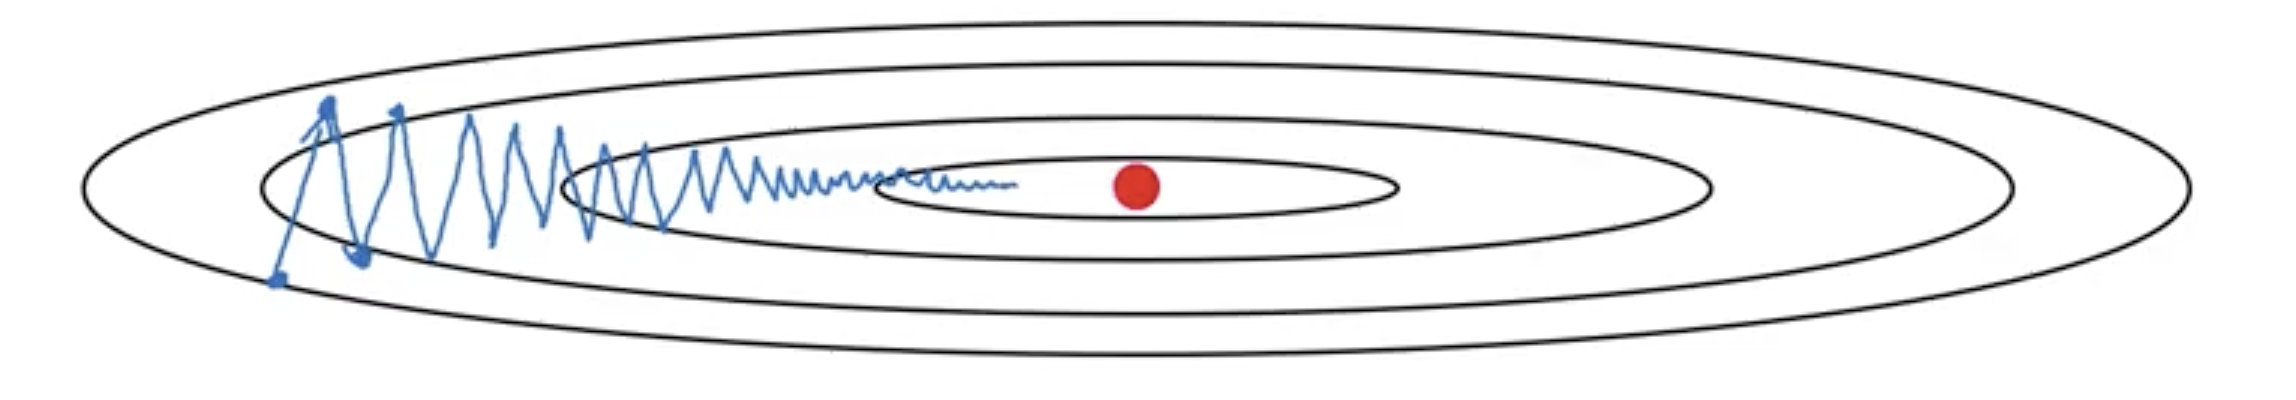

Чтобы градиент не проходил мимо минимума функции или достиг её за разумное время, нужно подобрать величину вектора, умножив его на коэффициент. Этот коэффициент называется *момент*, или *скорость обучения*.

**Локальные минимумы и максимумы. Момент (скорость обучения)**

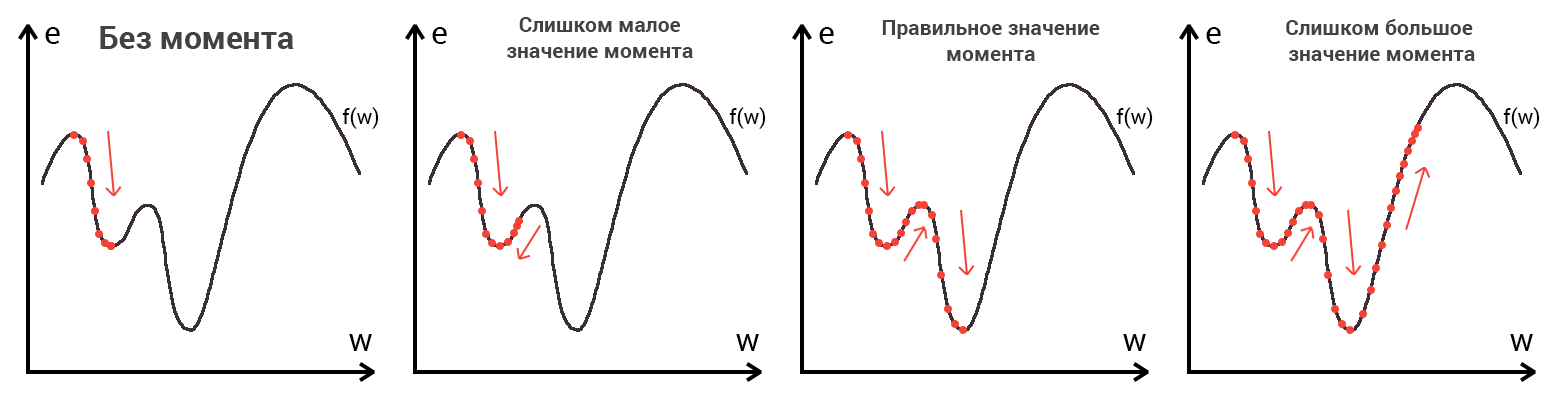

## 3.1.4 Алгоритм обратного распространения ошибки для обучения нейронных сетей (Скринкаст)

*Обратное распространение ошибки (backpropagation)* — это способ обучения нейронной сети. Цели обратного распространения просты: отрегулировать каждый вес пропорционально тому, насколько он способствует общей ошибке. Если мы будем итеративно уменьшать ошибку каждого веса, в конце концов у нас будет ряд весов, которые дают хорошие прогнозы.

Математика процесса достаточно сложная, однако сейчас нет смысла её рассматривать, есть много статей и одна из них есть в литературе ниже. Но основная идея - рассчитать и добавить поправки к весам начиная от выходных нейронов к входным, то есть в направлении, обратном прямому распространению сигнала от входа к выходу.

### Пример изменения весов и других параметров при обучении простейшей нейронной сети

In [ ]:
# Подключаем библиотеку numpy
import numpy as np

# получим функцию
def f(x):
    return 2/(1 + np.exp(-x)) - 1

# получим производную этой функции
def df(x):
    return 0.5*(1 + x)*(1 - x)

# зададим веса
W1 = np.array([[-0.2, 0.3, -0.4], [0.1, -0.3, -0.4]])   # веса первого слоя
W2 = np.array([0.2, 0.3])                               # веса второго слоя

# проход при обучении
def go_forward(inp):
    sum = np.dot(W1, inp)
    out = np.array([f(x) for x in sum])

    sum = np.dot(W2, out)
    y = f(sum)
    return (y, out)

# тренировка
def train(epoch):
    global W2, W1
    lmd = 0.01          # шаг обучения
    N = 100001           # число итераций при обучении
    count = len(epoch)
    for k in range(N):
        x = epoch[np.random.randint(0, count)]  # случайных выбор входного сигнала из обучающей выборки
        y, out = go_forward(x[0:3])             # прямой проход по НС и вычисление выходных значений нейронов
        e = y - x[-1]                           # ошибка
        delta = e*df(y)                         # локальный градиент
        W2[0] = W2[0] - lmd * delta * out[0]    # корректировка веса первой связи
        W2[1] = W2[1] - lmd * delta * out[1]    # корректировка веса второй связи

        delta2 = W2*delta*df(out)               # вектор из 2-х величин локальных градиентов

        # корректировка связей первого слоя
        W1[0, :] = W1[0, :] - np.array(x[0:3]) * delta2[0] * lmd
        W1[1, :] = W1[1, :] - np.array(x[0:3]) * delta2[1] * lmd

        # выводим результаты
        if k % 10000 == 0: # Выводим каждую 1000 - ю эпоху обучения
            print(f'эпоха: {k}, прогноз: {np.round(y,3)}, ответ: {np.round(x[-1],3)}, ошибка: {np.round(e,3)}, градиент: {np.round(delta,3)}, \n W1: {np.round(W1,3)}, W2: {np.round(W2,3)}')

# обучающая выборка (она же полная выборка)
epoch = [(-1, -1, -1, -1),
         (-1, -1, 1, 1),
         (-1, 1, -1, -1),
         (-1, 1, 1, 1),
         (1, -1, -1, -1),
         (1, -1, 1, 1),
         (1, 1, -1, -1),
         (1, 1, 1, -1)]


In [ ]:
train(epoch)        # запуск обучения сети

эпоха: 0, прогноз: -0.052, ответ: 1, ошибка: -1.052, градиент: -0.525, 
 W1: [[-0.201  0.301 -0.399]
 [ 0.099 -0.299 -0.399]], W2: [0.2   0.298]
эпоха: 10000, прогноз: 0.93, ответ: 1, ошибка: -0.07, градиент: -0.005, 
 W1: [[ 1.122  1.164 -2.088]
 [ 0.148 -0.242 -0.454]], W2: [-3.345 -0.339]
эпоха: 20000, прогноз: 0.954, ответ: 1, ошибка: -0.046, градиент: -0.002, 
 W1: [[ 1.187  1.241 -2.317]
 [ 0.15  -0.215 -0.552]], W2: [-3.711 -0.444]
эпоха: 30000, прогноз: 0.933, ответ: 1, ошибка: -0.067, градиент: -0.004, 
 W1: [[ 1.212  1.277 -2.44 ]
 [ 0.144 -0.2   -0.619]], W2: [-3.87  -0.509]
эпоха: 40000, прогноз: 0.113, ответ: -1, ошибка: 1.113, градиент: 0.55, 
 W1: [[ 1.235  1.304 -2.522]
 [ 0.138 -0.191 -0.676]], W2: [-3.965 -0.561]
эпоха: 50000, прогноз: -0.947, ответ: -1, ошибка: 0.053, градиент: 0.003, 
 W1: [[ 1.279  1.352 -2.554]
 [ 0.135 -0.181 -0.721]], W2: [-4.018 -0.597]
эпоха: 60000, прогноз: 0.95, ответ: 1, ошибка: -0.05, градиент: -0.002, 
 W1: [[ 1.322  1.397 -2.575]
 [ 0.13

Рассмотрим пример создания и обучения нейронной сети фреймворка глубокого обучения Tensorflow Keras. Это похоже на обучение алгоритмов машинного обучения с той разницей, что сам алгоритм можно построить вручную послойно.

### Создаём модель Sequential

**Sequential** - это последовательная модель, в которой слои нейронной сети укладываются последовательно, как слои в блинном пироге.

#### Используем линейные (одномерные) данные

In [ ]:
model = Sequential() # Создаём полносвязную сеть
model.add(Dense(80, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 80 нейронов с relu-активацией, указываем входной размер 784, соответствующий размеру входных данных
model.add(Dense(40, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 80)                62800     
_________________________________________________________________
dense_39 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                410       
Total params: 66,450
Trainable params: 66,450
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.6776 - accuracy: 0.8100
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1689 - accuracy: 0.9518
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1175 - accuracy: 0.9656
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0964 - accuracy: 0.9718
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.9768
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9812
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9839
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0426 - accuracy: 0.9873
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9878
Epoch 10/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9903

### Подбор параметров нейронной сети

#### Построение зависимости точности от числа нейронов входного слоя

nodes=15: 94.96
nodes=20: 95.84
nodes=50: 97.28
nodes=800: 98.30
nodes=1200: 98.55
nodes=2500: 97.87
nodes=4000: 97.48
nodes=6000: 98.21


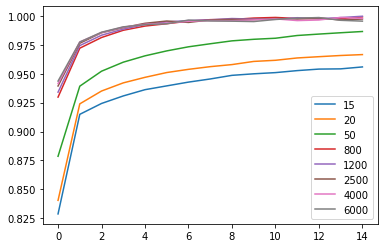

In [ ]:
num_nodes = [15, 20, 50, 800, 1200, 2500, 4000, 6000] # будем тестировать такие количества нейронов
learning_dict = {} # здесь сохраним результаты обучения
for n_nodes in num_nodes:
  model = Sequential() # Создаём полносвязную сеть
  model.add(Dense(n_nodes, input_dim=784, activation="relu")) # Добавляем полносвязный слой на n_nodes нейронов с relu-активацией
  #model.add(Dense(40, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
  model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
  history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=0) # запускаем обучение без вывода прогресса (verbose=0)
  _, test_acc = model.evaluate(x_test, y_test, verbose=0) # оцениваем результатыобучения
  acc = round(test_acc * 100, 2) # переводим в проценты и округляем
  print('nodes=%d: %.2f' % (n_nodes, acc)) # выводим результаты
  learning_dict[n_nodes] = acc # сохраняем результаты в словарь

  plt.plot(history.history['accuracy'], label=str(n_nodes)) # строим кривые обучения
plt.legend()
plt.show()


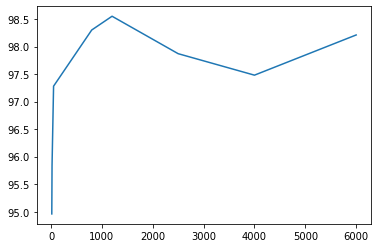

In [ ]:
# строим зависимость точности обучения от числа нейронов внешнего слоя
plt.plot(list(learning_dict.keys()), list(learning_dict.values()), label=str(n_nodes))
plt.show()

#### Построение зависимости точности от размера batch_size

batch_size=700: 98.06
batch_size=300: 98.20
batch_size=100: 98.13
batch_size=50: 98.07
batch_size=10: 98.23


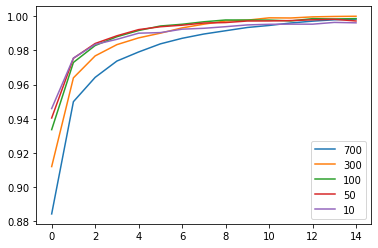

In [ ]:
batch_size = [700, 300, 100, 50, 10]
learning_dict2 = {} # здесь сохраним результаты обучения
for n in batch_size:
  model = Sequential() # Создаём полносвязную сеть
  model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
  #model.add(Dense(40, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
  model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
  history = model.fit(x_train, y_train, batch_size=n, epochs=15, verbose=0)
  _, test_acc = model.evaluate(x_test, y_test, verbose=0)
  acc = round(test_acc * 100, 2) # переводим в проценты и округляем
  print('batch_size=%d: %.2f' % (n, acc))
	# plot learning curve
  plt.plot(history.history['accuracy'], label=str(n))
  learning_dict2[n] = acc # сохраняем результаты в словарь
plt.legend()
plt.show()


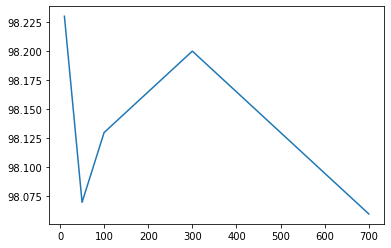

In [ ]:
# строим зависимость точности обучения от размера батча
plt.plot(list(learning_dict2.keys()), list(learning_dict2.values()), label=str(n_nodes))
plt.show()

#### Расщепление выборки "на лету" на тренировочную и валидационную

In [ ]:
model = Sequential() # Создаём полносвязную сеть
model.add(Dense(80, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 80 нейронов с relu-активацией
model.add(Dense(40, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
my_model=model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 0.7793 - accuracy: 0.7759 - val_loss: 0.1795 - val_accuracy: 0.9490
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2020 - accuracy: 0.9416 - val_loss: 0.1316 - val_accuracy: 0.9643
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1442 - accuracy: 0.9574 - val_loss: 0.1120 - val_accuracy: 0.9675
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1109 - accuracy: 0.9675 - val_loss: 0.1068 - val_accuracy: 0.9680
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.9735 - val_loss: 0.0991 - val_accuracy: 0.9700
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0910 - val_accuracy: 0.9720
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9815 - val_loss: 0.0811 - val_accuracy: 0.9748
Epoch 

In [ ]:
# Ключи в структуре history
print(my_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


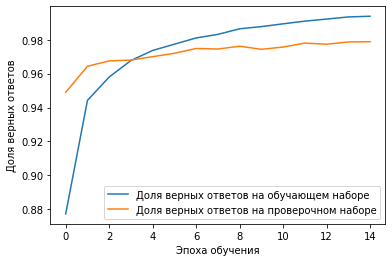

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(my_model.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(my_model.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

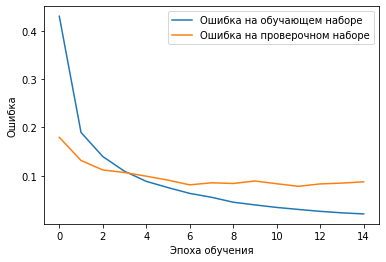

In [ ]:
# Выводим графики ошибки
plt.plot(my_model.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(my_model.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

#### Подаём отдельно созданные валидационные данные в обучение

In [ ]:
# test_size=0.2 - будет выделено 20% от тренировочных данных
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)
print (x_train1.shape)
print (x_test1.shape)
print (y_train1.shape)
print (y_test1.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [ ]:
model = Sequential() # Создаём полносвязную сеть
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
# print(model.summary()) #Вывод структуры модели
my_model = model.fit(x_train1, y_train1, batch_size=128, epochs=15, validation_data=(x_test1, y_test1), verbose=1)

Epoch 1/15
375/375 [==============================] - 4s 6ms/step - loss: 0.2263 - accuracy: 0.9335 - val_loss: 0.1164 - val_accuracy: 0.9634
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.0841 - val_accuracy: 0.9723
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0816 - val_accuracy: 0.9754
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0842 - val_accuracy: 0.9745
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0880 - val_accuracy: 0.9765
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0820 - val_accuracy: 0.9775
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0885 - val_accuracy: 0.9773
Epoch 

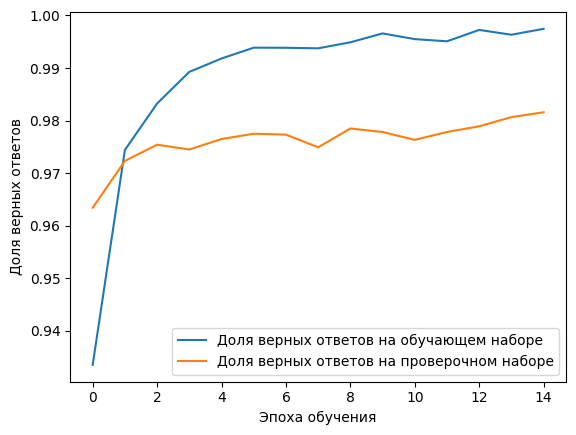

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(my_model.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(my_model.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

#### Используем плоские матричные (двумерные) данные

Предполагаем, что при "вытягивании" данных в вектор, мы теряем взаимосвязи между строчками на картинке. То есть, часть информации полностью теряется, что может привести к ухудшению распознавания объектов (в данном случае рукописных цифр). Попробуем эту гипотезу проверить.

In [ ]:
# test_size=0.2 - будет выделено 20% от тренировочных данных
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train1_2D, x_test1_2D, y_train1_2D, y_test1_2D = train_test_split(
                        x_train_2D, y_train, test_size=0.2, shuffle=True)

print (x_train1_2D.shape)
print (x_test1_2D.shape)
print (y_train1_2D.shape)
print (y_test1_2D.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000, 10)
(12000, 10)


In [ ]:
model_2d = Sequential() # Создаём полносвязную сеть
model_2d.add(Dense(800, input_shape=(28,28), activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model_2d.add(MaxPooling1D())
model_2d.add(Flatten()) # Вытягиваем данные в одномерный вектор только для классификационного слоя
model_2d.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model_2d.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model_2d.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model_2d.summary()) #Вывод структуры модели
my_model_2d = model_2d.fit(x_train1_2D, y_train1_2D, batch_size=128, epochs=15, validation_data=(x_test1_2D, y_test1_2D), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 800)           23200     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 800)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 11200)             0         
                                                                 
 dense_1 (Dense)             (None, 400)               4480400   
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 4,507,610
Trainable params: 4,507,610
Non-trainable params: 0
______________________________________________

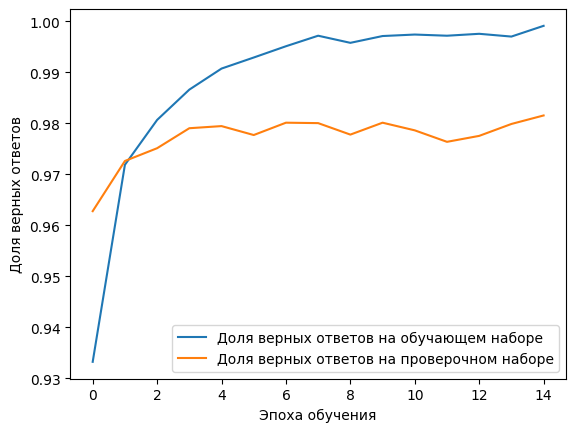

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(my_model_2d.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(my_model_2d.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

#### Сравниваем результаты по одномерной и двумерной полносвязным нейронным сетям

##### Строим матрицы ошибок

###### Для линейной модели

In [ ]:
y_test_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_test_pred.shape

(10000, 10)

In [ ]:
y_test_pred[0] # выводим отличие - здесь не OHE, а вероятности разных классов

array([6.50548917e-15, 2.62578235e-13, 2.21570765e-12, 1.38616171e-14,
       1.35690816e-14, 4.21560330e-16, 3.70972348e-18, 1.00000000e+00,
       2.29880613e-15, 7.95052121e-13], dtype=float32)

In [ ]:
y_test_pred_= np.argmax(y_test_pred, axis=1) # с помощью argmax получаем индекс наибольшего элемента вектора
y_test_pred_.shape

(10000,)

In [ ]:
y_test_pred_[0]

7

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_test_ = np.argmax(y_test, axis=1)
y_test_.shape

(10000,)

In [ ]:
y_test_[0]

7

Text(123.72222222222221, 0.5, 'predicted label')

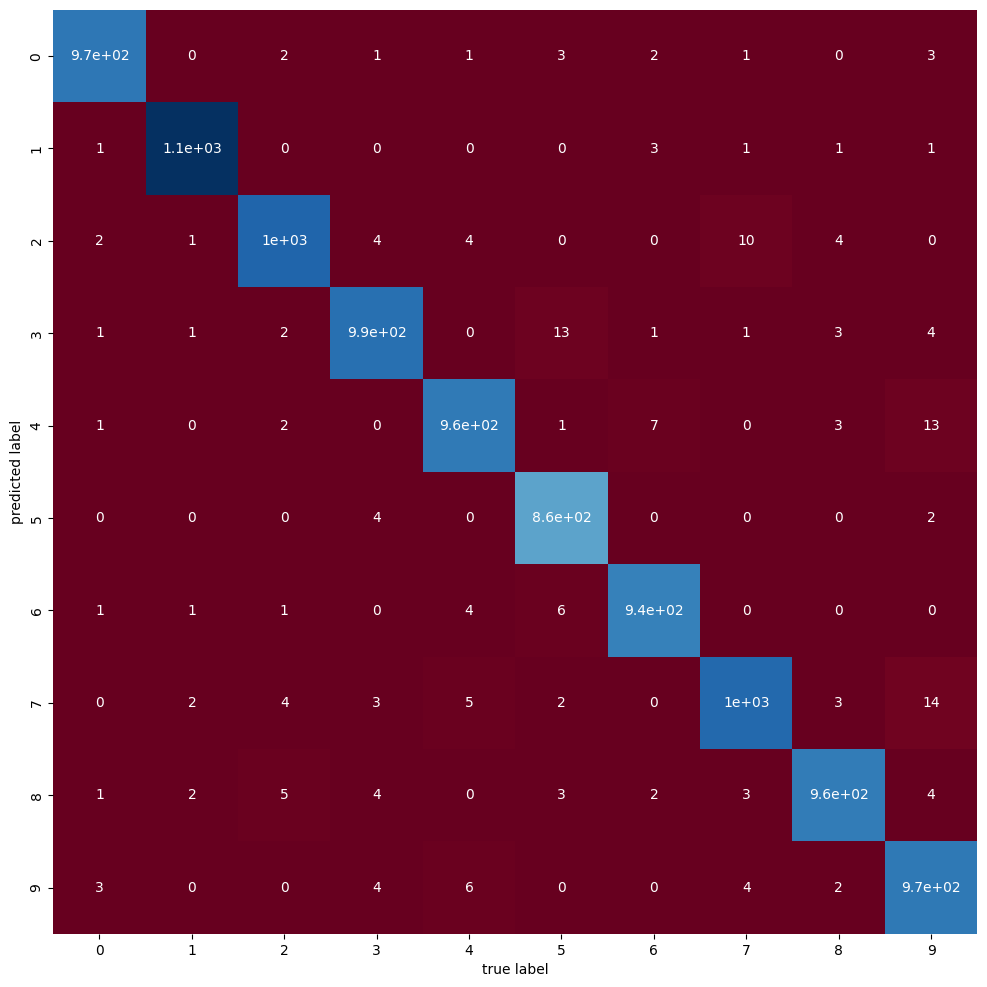

In [ ]:
# пробуем построить матрицу ошибок
plt.figure(figsize=(12, 12)) # задаем размеры всего рисунка
cm = confusion_matrix(y_test_pred_, y_test_) # создаём матрицу ошибок
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

###### Для двумерной модели

In [ ]:
y_test_2D_pred = model_2d.predict(x_test_2D)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_test_2D_pred.shape

(10000, 10)

In [ ]:
y_test_2D_pred_= np.argmax(y_test_2D_pred, axis=1)
y_test_2D_pred_.shape

(10000,)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test_ = np.argmax(y_test, axis=1)
y_test_.shape

(10000,)

Text(123.72222222222221, 0.5, 'predicted label')

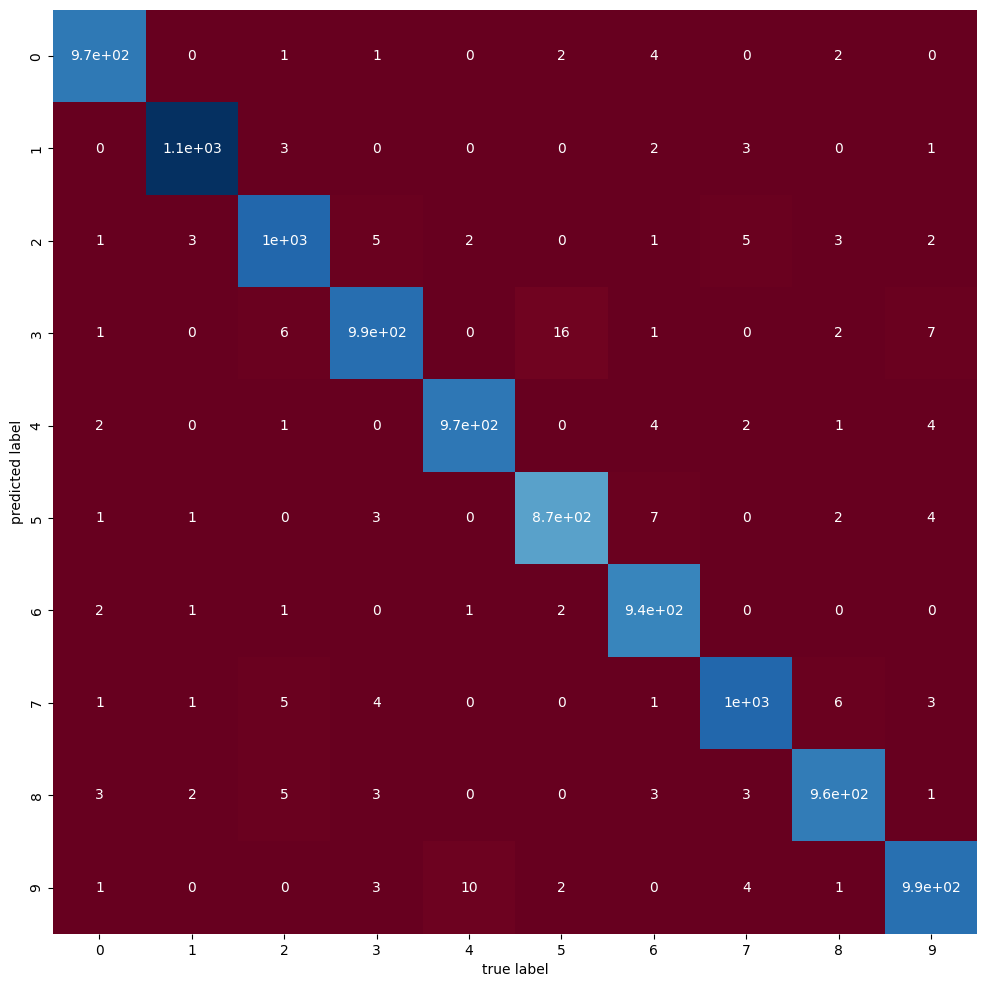

In [ ]:
# пробуем построить матрицу ошибок
plt.figure(figsize=(12, 12)) # задаем размеры всего рисунка
cm = confusion_matrix(y_test_2D_pred_, y_test_) # создаём матрицу ошибок
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

##### Вывод

Двумерная модель даёт небольшое преимущество в данном случае перед одномерной. Наша гипотеза верна.


# Литература

1. https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC

2. https://neurohive.io/ru/osnovy-data-science/obuchenie-s-uchitelem-bez-uchitelja-s-podkrepleniem/

3. https://habr.com/ru/post/74326/

4. https://pythonru.com/primery/raspoznavanie-rukopisnyh-cifr-na-p-ython-gui

5. https://www.machinelearningmastery.ru/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

6. https://github.com/Romakhov/MNIST-Neural-Network

7. https://proglib.io/p/neural-network-course/

8. https://pyprog.pro/sort/argmax.html

9. https://pyprog.pro/sort/argmin.html

10. https://www.kaggle.com/uciml/pima-indians-diabetes-database

11. https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/

12. https://www.machinelearningmastery.ru/handle-missing-data-python/

13. https://github.com/yanniey/ML-with-Python-Predicting-Diabetes-using-the-Pima-Indian-Diabetes-Dataset

14. https://proglib.io/p/diabetes-network/

15. https://neerc.ifmo.ru/wiki/index.php?title=%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8,_%D0%BF%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD

16. https://habr.com/ru/post/144881/

17. https://habr.com/ru/post/318970/?source=post_page---------------------------

18. https://fooobar.com/questions/16781807/what-is-an-optimizer-in-neural-networks

19. https://proproprogs.ru/neural_network/optimizatory-v-keras-formirovanie-vyborki-validacii

20. https://otus.ru/nest/post/1592/

21. https://neurohive.io/ru/osnovy-data-science/obratnoe-rasprostranenie/

22. https://microtechnics.ru/obuchenie-nejronnoj-seti-algoritm-obratnogo-rasprostraneniya-oshibok/

23. https://habr.com/ru/company/ods/blog/328372/

24. https://fb.ru/article/457879/perseptron---eto-opredelenie-termina-osobennosti-primenenie

25. https://neerc.ifmo.ru/wiki/index.php?title=%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8,_%D0%BF%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD

26. https://www.machinelearningmastery.ru/state-of-the-art-activation-functions-explained-gelu-selu-elu-relu-and-more-a4247171ca4e/

27. https://mlfromscratch.com/

28. http://www.myshared.ru/slide/373724/

29. https://infourok.ru/prezentaciya-k-vebinaru-osnovi-algoritmizacii-na-primere-mashinnogo-obucheniya-1735966.html

30. https://vbystricky.github.io/2018/03/optimization_grad_desc.html

31. https://3deep.ru/machinelearning-items/raspoznavanie-rukopisnogo-teksta-mnist-03/

32. https://habr.com/ru/post/313216/

33. https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8

34. https://www.uznaychtotakoe.ru/proizvodnaya/

35. https://function-x.ru/differential.html

36. https://neurohive.io/ru/osnovy-data-science/obratnoe-rasprostranenie/









# The End